In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df1=pd.read_csv(r"D:\Sousan\movies.csv")

In [8]:
df1.head()

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [9]:
df1['vote_count'][:5]

0    11800
1     4500
2     4466
3     9106
4     2124
Name: vote_count, dtype: int64

In [10]:
df1['vote_average'][:5]

0    7.2
1    6.9
2    6.3
3    7.6
4    6.1
Name: vote_average, dtype: float64

In [13]:
df1 = df1.dropna(subset=['overview'])

## Movie recommendation system using machine learning

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Convert the movie descriptions into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(min_df=1, max_df=0.8)
tfidf_matrix = tfidf_vectorizer.fit_transform(df1['overview'])

In [16]:
# Calculate the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(tfidf_matrix)

In [28]:
def get_recommendations(movie_id, cosine_sim_matrix, top_n=10):
    # Get the index of the movie to recommend
    movie_index = df1[df1['movie_id'] == movie_id].index[0]

    # Get the cosine similarity scores for the current movie
    cosine_scores = cosine_sim_matrix[movie_index]

    # Get the top n most similar movies
    top_n_indices = np.argsort(cosine_scores)[-top_n:]

    # Get the recommended movie IDs
    recommended_movie_ids = df1.loc[top_n_indices, 'movie_id'].tolist()

    # Return the recommended movie IDs
    return recommended_movie_ids

In [29]:
# Get the movie ID of the movie you want to recommend
movie_id = input("Enter the movie ID: ")

# Get the recommended movie IDs
recommended_movie_ids = get_recommendations(int(movie_id), cosine_sim_matrix)

# Print the recommended movies
recommended_movies = df1[df1['movie_id'].isin(recommended_movie_ids)]['title'].tolist()
print("Recommended movies:")
for movie in recommended_movies:
    print(movie)

Enter the movie ID: 285
Recommended movies:
Pirates of the Caribbean: At World's End
Men in Black 3
Star Trek Into Darkness
Disturbia
Restoration
What's Love Got to Do with It
The Brothers Solomon
Heavenly Creatures
Truth or Dare
The Signal


In [69]:
C=df1['vote_average'].mean()
C

6.092171559442016



#The average rating for all the movies is approximately 6 out of 10. To determine the minimum number of votes required for a movie to be included in the chart, we'll consider the 90th percentile as our cutoff. This means that a movie must have more votes than at least 90% of the other movies in the list to be included in the chart. In other words, we're aiming to highlight movies that have received a significant number of votes, indicating a broader consensus among viewers.

In [70]:
m=df1['vote_count'].quantile(0.9)
m

1838.4000000000015

In [71]:
s=df1.copy().loc[df1['vote_count'] >=m]
s.shape

(481, 20)

In [72]:
s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 481 entries, 0 to 4602
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                481 non-null    int64  
 1   genres                481 non-null    object 
 2   homepage              349 non-null    object 
 3   movie_id              481 non-null    int64  
 4   keywords              481 non-null    object 
 5   original_language     481 non-null    object 
 6   original_title        481 non-null    object 
 7   overview              481 non-null    object 
 8   popularity            481 non-null    float64
 9   production_companies  481 non-null    object 
 10  production_countries  481 non-null    object 
 11  release_date          481 non-null    object 
 12  revenue               481 non-null    int64  
 13  runtime               481 non-null    float64
 14  spoken_languages      481 non-null    object 
 15  status                481 n

In [78]:
s['score'] = s.apply(weighted_rating,axis=1)
s['score']

0       7.050669
1       6.665696
2       6.239396
3       7.346721
4       6.096368
          ...   
4291    6.693677
4300    7.366378
4302    7.210428
4337    7.198026
4602    7.210563
Name: score, Length: 481, dtype: float64

In [80]:
s=s.sort_values('score',ascending=False)

# Top 10 movies 

In [81]:
s[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Popular Movies')

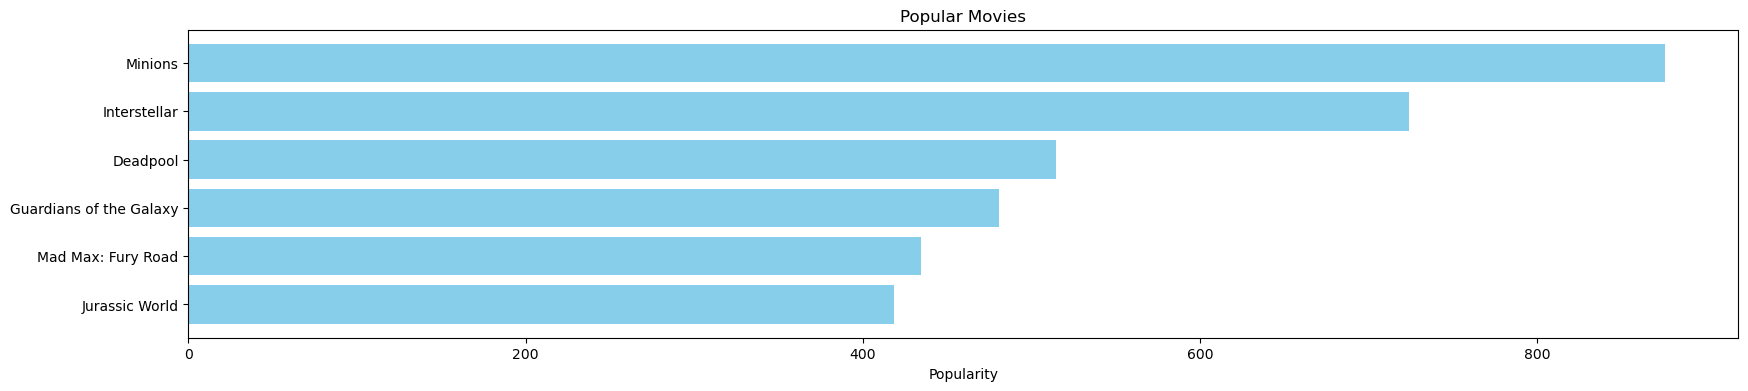

In [89]:
pop=df1.sort_values('popularity',ascending=False)

plt.figure(figsize=(20,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center', color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

<Axes: >

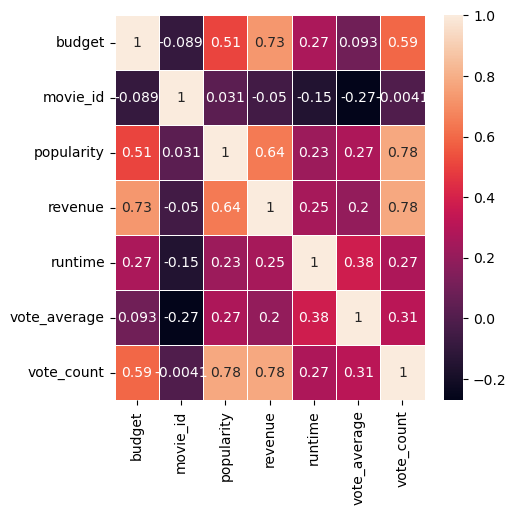

In [91]:
plt.figure(figsize=(5,5))
numeric_df2 = df1.select_dtypes(include=['number'])
sns.heatmap(numeric_df2.corr(),annot=True,linewidth=0.5)

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 900x900 with 0 Axes>

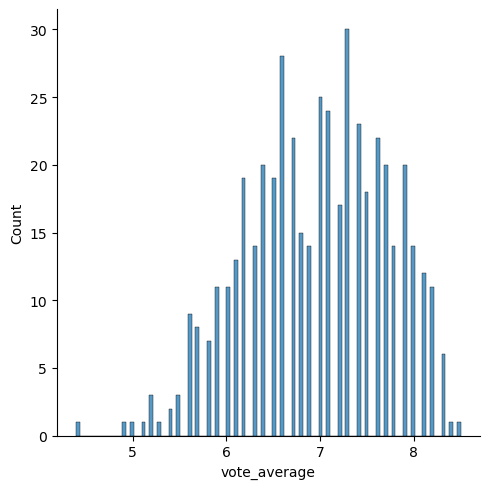

In [98]:
plt.figure(figsize=(9,9))
sns.displot(s['vote_average'],bins=100)

In [100]:
d.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [30]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


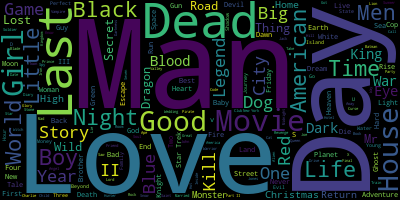

In [32]:
from wordcloud import WordCloud
wordcloud = WordCloud()
wordcloud.generate(df1['title'].to_string())
wordcloud.to_image()